In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [66]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [67]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [68]:
# EDA
# Univariet

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


## Univariet Analysis

<Figure size 432x288 with 0 Axes>

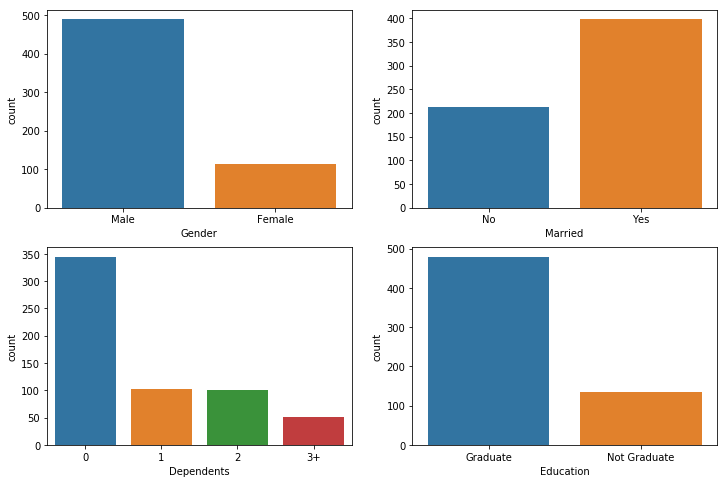

In [69]:
plt.figure(1)
plt.figure(figsize = [12,8])
plt.subplot(221)
sns.countplot(data = train, x = 'Gender')

plt.subplot(222)
sns.countplot(data = train, x = 'Married')


plt.subplot(223)
sns.countplot(data = train, x = 'Dependents')


plt.subplot(224)
sns.countplot(data = train, x = 'Education')
plt.show()


In [8]:
train.Gender.value_counts(normalize = True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [9]:
print(train.Married.value_counts(normalize = True)*100)

Yes    65.139116
No     34.860884
Name: Married, dtype: float64


In [10]:
print(train.Dependents.value_counts(normalize = True)*100)
# Will replace 3+ into 3

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64


In [11]:
print(train.Education.value_counts(normalize = True)*100)

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64


<Figure size 432x288 with 0 Axes>

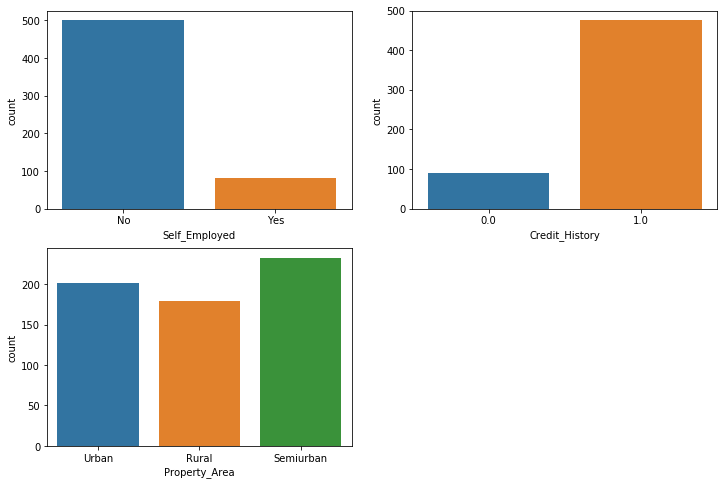

In [70]:
# Independent Categorical Variable

plt.figure(1)
plt.figure(figsize = [12,8])
plt.subplot(221)
sns.countplot(data = train, x = 'Self_Employed')

plt.subplot(222)
sns.countplot(data = train, x = 'Credit_History')


plt.subplot(223)
sns.countplot(data = train, x = 'Property_Area')
plt.show()



# Observation :- independence catogorical variable
1. Mare males as compare to female. 82% male & 18% female

2. Married people count more than unmarried.65% apply for loan & 34% not from married

3. In dependents , count 0 is more.

4. We have more graduate.78% graduate & 21% non graduate.

# Observation:-
1. self employee :- 14% people are self employees where as 86% are employee

2. 84% people have credite history & 16% people have dont

3. 38% semi urban, 33% Urban & 29% Rural properties

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


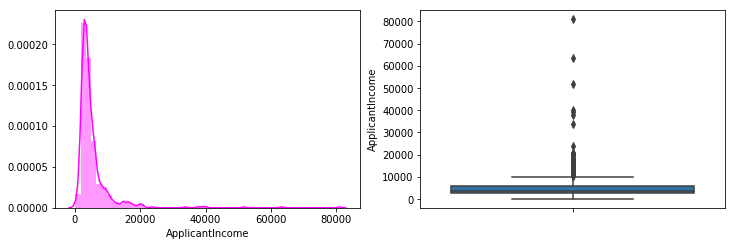

In [71]:
# Applicant Income
plt.figure(1,figsize=[12,8])
plt.subplot(221)
sns.distplot(train[pd.notnull(train.ApplicantIncome)]["ApplicantIncome"],color = "magenta") 

plt.subplot(222)
sns.boxplot(data = train,y='ApplicantIncome')

In [72]:
train.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

# Observation : Applicant Income :-
since the applicant income appear to be skewed , hense used log transform
to bring it in the normal state.

The boxplot on the othr side explains the existing of the outlier in the income.This shows that there is disapiorirty in the income in the society.

# Bivariet Analysis

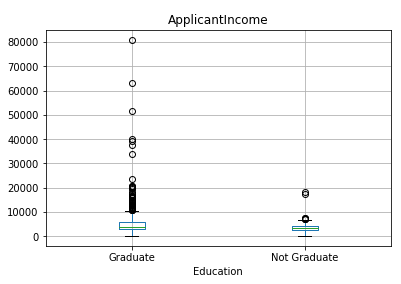

In [73]:
# Education & income
#sns.boxplot(data = train , x = 'Education' , y = 'ApplicantIncome')

train.boxplot(column='ApplicantIncome',by ='Education')
plt.suptitle(" ")
plt.show()

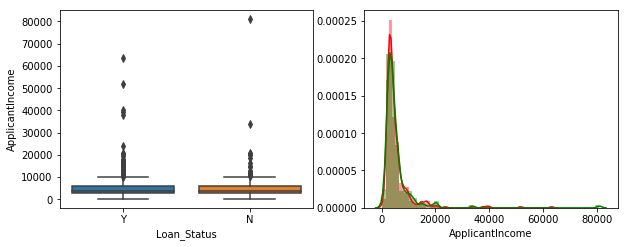

In [74]:
plt.figure(1,figsize = [10,8])
plt.subplot(221)
sns.boxplot(data = train , x = 'Loan_Status' , y = 'ApplicantIncome')

plt.subplot(222)
sns.distplot(train[train.Loan_Status =='Y']['ApplicantIncome'],color = 'red')
sns.distplot(train[train.Loan_Status =='N']['ApplicantIncome'],color = 'green')

plt.show()

In [75]:
train.groupby('Loan_Status')['ApplicantIncome'].describe().T

Loan_Status,N,Y
count,192.000000,422.000000
mean,5446.078125,5384.068720
std,6819.558528,5765.441615
min,150.000000,210.000000
25%,2885.000000,2877.500000
50%,3833.500000,3812.500000
75%,5861.250000,5771.500000
max,81000.000000,63337.000000


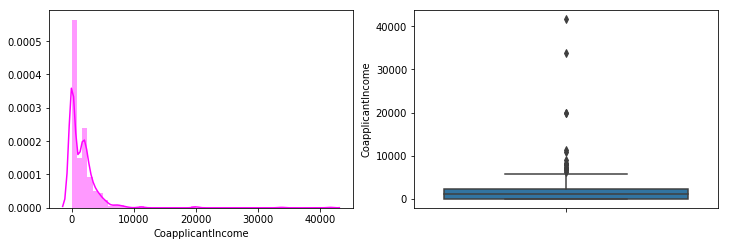

In [76]:
# CoapplicantIncome
plt.figure(1,figsize=[12,8])
plt.subplot(221)
sns.distplot(train[pd.notnull(train.CoapplicantIncome)]["CoapplicantIncome"],color = "magenta") 

plt.subplot(222)
sns.boxplot(data = train,y='CoapplicantIncome')

# Observation : CoapplicantIncome
since the coapplicant income appear to be skewed , hense it can be log transform
to bring it in the normal state.

The boxplot on the other side explains the existing of the outlier in the income.

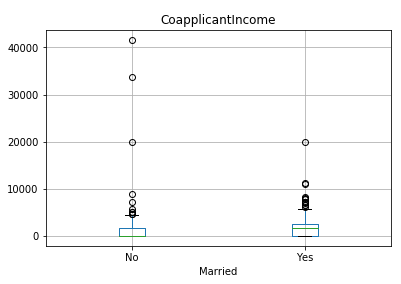

In [19]:
# Married & copplicantIncome
#sns.boxplot(data = train , x = 'Education' , y = 'copplicantIncome')

train.boxplot(column='CoapplicantIncome',by ='Married')
plt.suptitle(" ")
plt.show()

In [20]:
print('Married CoapplicantIncome' )
print(train[train.Married=='Yes']['CoapplicantIncome'].describe())
print()
print('Un-Married CoapplicantIncome' )
print(train[train.Married=='No']['CoapplicantIncome'].describe())

Married CoapplicantIncome
count      398.000000
mean      1794.632965
std       2039.962354
min          0.000000
25%          0.000000
50%       1625.000000
75%       2464.000000
max      20000.000000
Name: CoapplicantIncome, dtype: float64

Un-Married CoapplicantIncome
count      213.000000
mean      1316.558685
std       4097.418521
min          0.000000
25%          0.000000
50%          0.000000
75%       1783.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


Majorirty of CoApplicantIncome is of 5K

In [21]:
# Bivariat Analysis

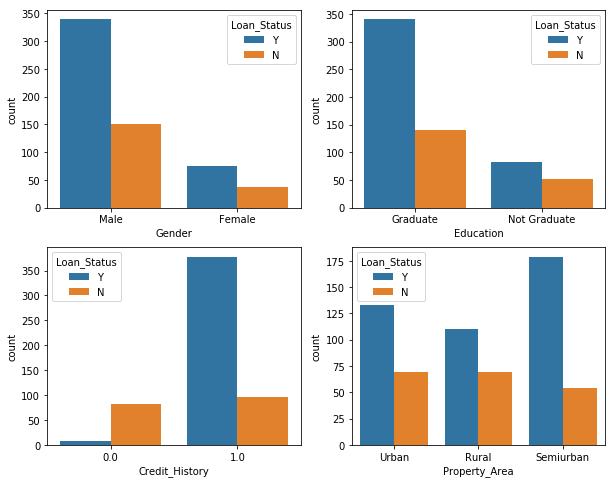

In [22]:
# Gender vs Loan_Status
plt.figure(1,figsize=[10,8])
plt.subplot(221)
sns.countplot(data = train, x = "Gender" , hue='Loan_Status')

plt.subplot(222)
sns.countplot(data = train, x = "Education" , hue ='Loan_Status')

plt.subplot(223)
sns.countplot(data = train, x = "Credit_History" , hue ='Loan_Status')

plt.subplot(224)
sns.countplot(data = train, x = "Property_Area" , hue ='Loan_Status')

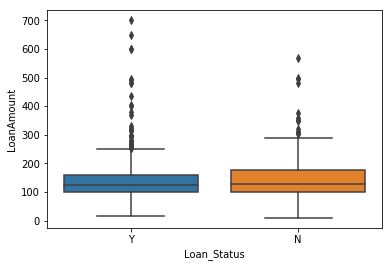

In [23]:
# Loan_Status vs LoanAmount
sns.boxplot(data = train , x = 'Loan_Status', y = 'LoanAmount')

In [24]:
print('Loan success loan Amount ratio ')
print(train[train.Loan_Status=='Y']['LoanAmount'].describe())
print()
print('Loan failure loan Amount ratio ')
print(train[train.Loan_Status=='N']['LoanAmount'].describe())

Loan success loan Amount ratio 
count    411.000000
mean     144.294404
std       85.484607
min       17.000000
25%      100.000000
50%      126.000000
75%      161.000000
max      700.000000
Name: LoanAmount, dtype: float64

Loan failure loan Amount ratio 
count    181.000000
mean     151.220994
std       85.862783
min        9.000000
25%      100.000000
50%      129.000000
75%      176.000000
max      570.000000
Name: LoanAmount, dtype: float64


In [77]:
# Dependnente
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [78]:
test.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [79]:
train.Dependents.replace(to_replace = '3+' , value = 3 , inplace = True)
test.Dependents.replace(to_replace = '3+' , value = 3 , inplace = True)

In [80]:
# Dependnente :- Replace 3+ into 3
train.Dependents.value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

# Observation:-
    
  1. Male get more loan compare to female.
  2. Graduate get more loan compare to non graduate.
  3. High loan frequency for the people having credit history of 1.0.
  4. Property of Disbursal of loan is more on Semi Urban & then Urban.

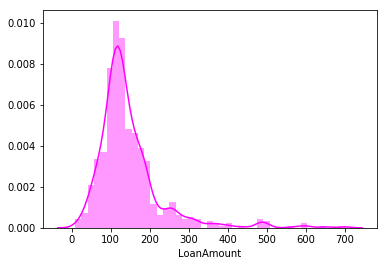

In [81]:
# LoanAmount
sns.distplot(train[pd.notnull(train.LoanAmount)]["LoanAmount"],color = "magenta") 

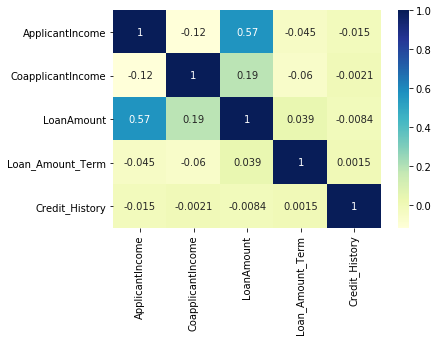

In [82]:
# Find the correlation & let make a changes
corrmat = train.corr()
sns.heatmap(corrmat , cmap='YlGnBu',annot = True)

# Correlation find out between Applicant income & loan amount
# also found between Coapplicant income & Loan Amount

# Handling missing values

In [83]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [84]:
# Train
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0],inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace = True)

In [85]:
# Test
test['Gender'].fillna(test['Gender'].mode()[0],inplace = True)
test['Married'].fillna(test['Married'].mode()[0],inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace = True)

In [33]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [86]:
train.LoanAmount.fillna(128,inplace =True)

In [87]:
test.LoanAmount.fillna(125,inplace =True)

In [88]:
# Feature Engineering 

In [89]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
train.LoanAmount.describe()
# Loan amount divide into category .. low amount , medium amount , High amount

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [39]:
# Can convert into year
train.Loan_Amount_Term.unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

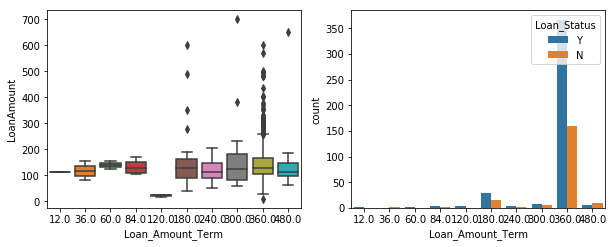

In [40]:
plt.figure(1,figsize=[10,8])
plt.subplot(221)
sns.boxplot(x = train.Loan_Amount_Term , y = train.LoanAmount)

plt.subplot(222)
sns.countplot(data =train , x = train.Loan_Amount_Term ,hue= train.Loan_Status)
plt.show()

In [41]:
train.Loan_Amount_Term.value_counts(normalize = True)
#train.Loan_Amount_Term.value_counts().sum()

360.0    0.856678
180.0    0.071661
480.0    0.024430
300.0    0.021173
84.0     0.006515
240.0    0.006515
120.0    0.004886
36.0     0.003257
60.0     0.003257
12.0     0.001629
Name: Loan_Amount_Term, dtype: float64

In [42]:
train.groupby('Loan_Status')['Loan_Amount_Term'].value_counts()

Loan_Status  Loan_Amount_Term
N            360.0               159
             180.0                15
             480.0                 9
             300.0                 5
             36.0                  2
             84.0                  1
             240.0                 1
Y            360.0               367
             180.0                29
             300.0                 8
             480.0                 6
             84.0                  3
             120.0                 3
             240.0                 3
             60.0                  2
             12.0                  1
Name: Loan_Amount_Term, dtype: int64

In [90]:
train['Year'] = train['Loan_Amount_Term']/12
test['Year'] = test['Loan_Amount_Term']/12

In [91]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

In [54]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Year,Total_Income,EMI,LoanAmountLog,EMI Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,30.0,5849.0,355.56,4.852030,5.873694,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,30.0,6091.0,355.56,4.852030,5.873694,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,30.0,3000.0,183.33,4.189655,5.211288,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,30.0,4941.0,333.33,4.787492,5.809133,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,30.0,6000.0,391.67,4.948760,5.970420,8.699515


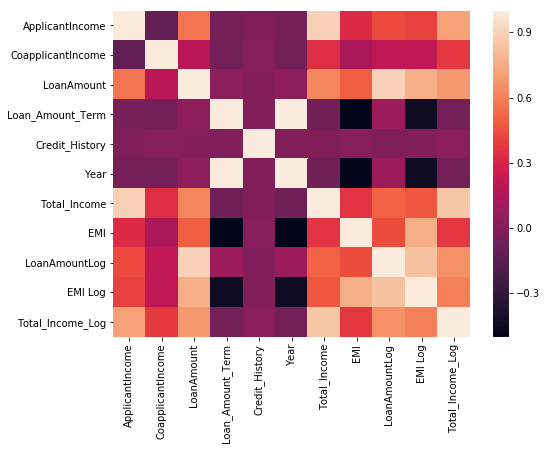

In [55]:
plt.figure(figsize = [8,6])
cr = train.corr()
sns.heatmap(cr)
plt.show()

In [56]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Year', 'Total_Income', 'EMI', 'LoanAmountLog', 'EMI Log',
       'Total_Income_Log'],
      dtype='object')

In [92]:
# creating new column EMI 
train['EMI'] = round((train.LoanAmount*1000)/train.Loan_Amount_Term,2)
test['EMI'] = round((test.LoanAmount*1000)/test.Loan_Amount_Term,2)

In [93]:
# Log transformation of EMI , LoanAmountLog , Total_Income in train data
train['LoanAmountLog'] = np.log(train.LoanAmount)
train['EMI Log'] = np.log(train.EMI)
train['Total_Income_Log'] = np.log(train.Total_Income)

In [94]:
# Log transformation of EMI , LoanAmountLog , Total_Income in test data
test['LoanAmountLog'] = np.log(test.LoanAmount)
test['EMI Log'] = np.log(test.EMI)
test['Total_Income_Log'] = np.log(test.Total_Income)

In [95]:
print(train.shape)
print(test.shape)

(614, 19)
(367, 18)


In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [103]:
newtrain = train.drop(['Loan_ID','Loan_Status'],1)
newtest = test.drop(['Loan_ID'],1)

In [104]:
print(newtrain.shape)
print(newtest.shape)

(614, 17)
(367, 17)


In [105]:
# ONE
dummytrain = pd.get_dummies(newtrain)
dummytest = pd.get_dummies(newtest)

In [106]:
print(dummytrain.shape)
print(dummytest.shape)

(614, 26)
(367, 26)


In [123]:
# Non scale Data 
pred_01 = dtree.fit(dummytrain , train.Loan_Status).predict(dummytest)

In [110]:
pred_tree = dtree.fit(scaled_train , train.Loan_Status).predict(scaled_test)

In [124]:
# submission
solution_01 = pd.DataFrame({"Loan_ID":test.Loan_ID,
                         "Loan_Status":pred_01})

In [127]:
solution_01.to_csv('sol_01.csv') # 68%

In [107]:
# Scaling data
#scaled_train = pd.DataFrame(sc.fit_transform(dummytrain),columns = dummytrain.columns)

scaled_train = pd.DataFrame(sc.fit_transform(dummytrain),columns = dummytrain.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [132]:
scaled_test = pd.DataFrame(sc.transform(dummytest),columns = dummytest.columns)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [133]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy')

In [136]:
# submission
solution = pd.DataFrame({"Loan_ID":test.Loan_ID,
                         "Loan_Status":pred_tree},index = None)

In [138]:
solution.to_csv('sol.csv') # 66%

In [129]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [139]:
knn.fit(scaled_train,train.Loan_Status)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [141]:
pred_knn = knn.predict(scaled_test)

In [142]:
# submission
solution = pd.DataFrame({"Loan_ID":test.Loan_ID,
                         "Loan_Status":pred_knn})

In [144]:
solution.to_csv('sol_Knn.csv',index = False) # 0.70

In [145]:
from sklearn.metrics import accuracy_score

In [146]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_train,train.Loan_Status,test_size=0.3,random_state=123)

In [150]:
acc = []
error = []
for i in list(range(1,10)):
    neigh = KNeighborsClassifier(n_neighbors=i)
    y_pred = neigh.fit(x_train,y_train).predict(x_test)
    acc.append(accuracy_score(y_test,y_pred))
    error.append(1-(accuracy_score(y_test,y_pred)))

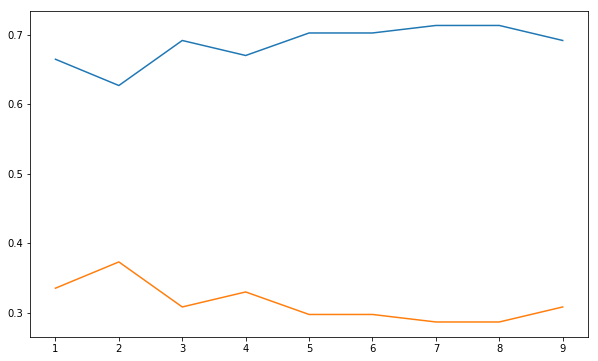

In [151]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),acc)
plt.plot(range(1,10),error)
plt.show()

In [152]:
y_pred03 = KNeighborsClassifier(n_neighbors=7).fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [153]:
solution = pd.DataFrame({"Loan_ID":test.Loan_ID,
                         "Loan_Status":y_pred03})
solution.to_csv('solution_knn_07.csv',index=False) # 72

In [154]:
cd

C:\Users\HEMANT T


In [159]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [162]:
y_pred_rf = rf.fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [164]:
solution = pd.DataFrame({"Loan_ID":test.Loan_ID,
                         "Loan_Status":y_pred_rf})
solution.to_csv('solution_rf.csv',index=False) # 0.66